In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize' : (20,10)})

In [24]:
events_data = pd.read_csv('DataSets/event_data_train.csv')

In [25]:
submissions_data = pd.read_csv('DataSets/submissions_data_train.csv')

In [11]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [6]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [26]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [27]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [28]:
submissions_data['day'] = submissions_data.date.dt.date

In [29]:
events_data['day'] = events_data.date.dt.date

In [16]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


### Количество уникальных пользователей по дням

In [23]:
events_data.groupby('day') \
    .user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

<AxesSubplot:xlabel='day'>

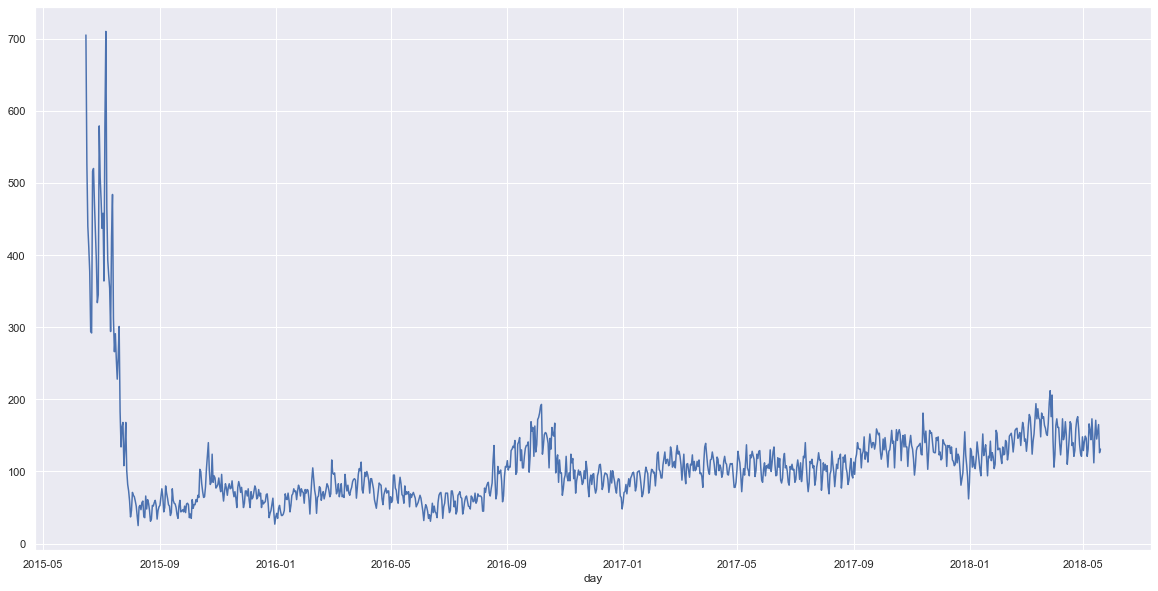

In [27]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [28]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


## Количество пользователей в зависимости от количества решенных задач

In [13]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id' : 'count'}) \
    .rename(columns={'step_id' : 'passed_steps'}).head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


<AxesSubplot:>

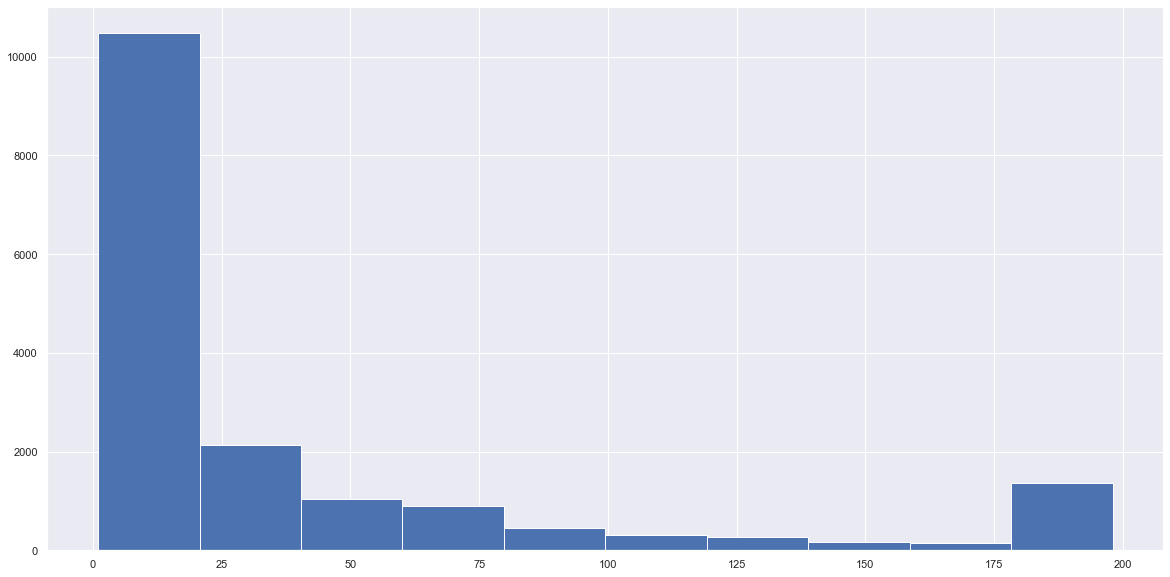

In [38]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id' : 'count'}) \
    .rename(columns={'step_id' : 'passed_steps'}).passed_steps.hist()

In [15]:
events_data.sort_values('user_id').head()

,step_id,timestamp,action,user_id,date,day
1347417,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02
1347416,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02
2874398,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27
2874403,32811,1514383372,viewed,2,2017-12-27 14:02:52,2017-12-27
2874419,32812,1514383469,viewed,2,2017-12-27 14:04:29,2017-12-27


## Сформируем новую таблицу с помощью pivot_table, где значения в action будут новыми колонками, а значения в ячейках = количество step_id

In [10]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()

In [151]:
users_events_data.sort_values('passed', ascending=False)

action,user_id,discovered,passed,started_attempt,viewed
4089,5653,198,198,93,261
18822,26225,198,198,109,487
854,1139,198,198,77,244
1256,1715,198,198,111,389
10688,14841,198,198,109,520
...,...,...,...,...,...
5535,7662,1,0,1,1
11445,15899,1,0,1,1
16817,23420,1,0,1,1
1747,2385,1,0,1,1


<AxesSubplot:>

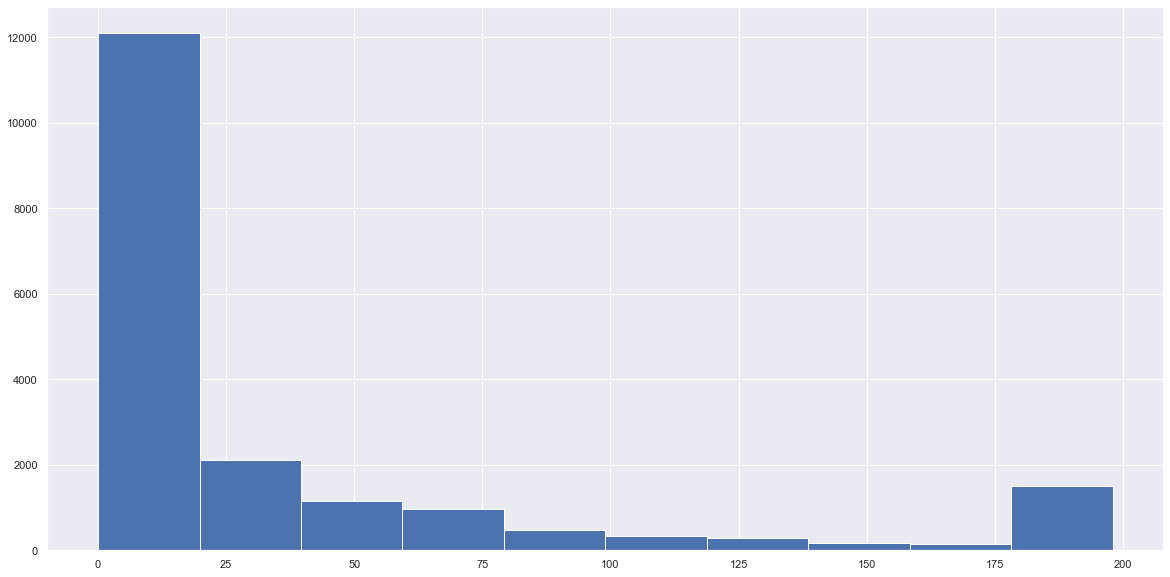

In [8]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index().discovered.hist()

In [14]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [11]:
user_scores = submissions_data.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', 
                             aggfunc='count', 
                             fill_value=0).reset_index()

In [18]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


## Удалим дубликаты (user_id и day, оставим один заход в день для пользователя), сгруппируем по пользователям и по всех заходам за все время, поместим все заходы в лист и найдем разницу по времени между заходами

In [23]:
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

### сохраним только значения в отдельную переменную

In [12]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

### соедимим все в один лист в переведем в серию

In [13]:
np.concatenate(gap_data)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [14]:
gap_data = pd.Series(np.concatenate(gap_data))

### переведем секунды в дни

In [15]:
gap_data = gap_data / (24 * 60 * 60)

In [16]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

### отбросим слишком большой перерыв

<AxesSubplot:>

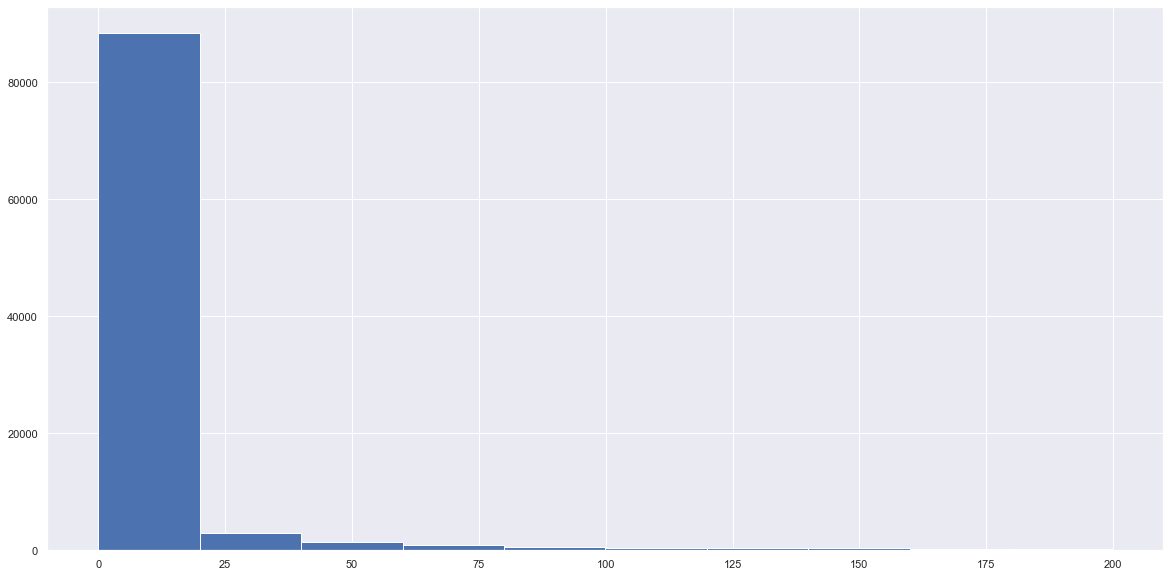

In [32]:
gap_data[gap_data < 200].hist()

In [41]:
gap_data.quantile(0.90)

18.325995370370403

In [106]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


## Сделаем проверку: если студента не было больше 30 дней до сегодняшнего дня, то будем считать, что он покинул курс

In [17]:
now = events_data.timestamp.max()
drop_out_threshold = 30 * 24 * 60 * 60

In [18]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [19]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

## Соединим 2 таблицы через merge

In [159]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [113]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [20]:
users_data = users_data.merge(user_scores, how='outer')

In [161]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [21]:
users_data = users_data.fillna(0)

In [163]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


## Соединим с еще одной таблицей users_events_data:

In [22]:
users_data = users_data.merge(users_events_data, how='outer')

In [23]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


## Посчитаем сколько пользователь был дней в сервисе

In [166]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [24]:
users_days = events_data.groupby('user_id').agg({'day' : 'nunique'}).reset_index()

In [168]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [25]:
users_data = users_data.merge(users_days, how='outer')

In [170]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [171]:
users_data.user_id.nunique()

19234

In [172]:
events_data.user_id.nunique()

19234

## Добавим колонку: прошел пользователь курс или нет (больше 170 баллов)

In [26]:
users_data['passed_course'] = users_data.passed > 170

In [27]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [28]:
users_data.groupby('passed_course').size()

passed_course
False    17809
True      1425
dtype: int64

## 7.4% процента пользователей прошли курс

In [179]:
users_data['passed_course'].value_counts(normalize=True)

False    0.925912
True     0.074088
Name: passed_course, dtype: float64

In [182]:
pd.Series(users_data.is_gone_user == users_data.passed_course).value_counts(normalize=True) * 100

False    92.586046
True      7.413954
dtype: float64

In [29]:
users_data.to_csv('DataSets/users_data.csv')

## Продолжение анализа

In [12]:
users_data = pd.read_csv('DataSets/users_data.csv')

In [13]:
users_data.head()

,Unnamed: 0,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [7]:
users_data[users_data.passed_course].day.median()

20.0

<AxesSubplot:>

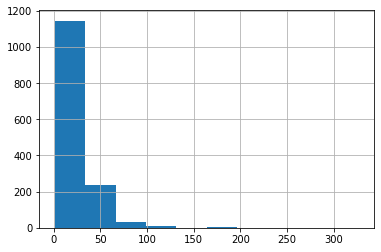

In [8]:
users_data[users_data.passed_course].day.hist()

## Отберем события из общего датафрейма первых трех дней пользователя

In [34]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


### Дата первого действия пользователя на сервисе

In [14]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp' : min}) \
    .rename({'timestamp' : 'min_timestamp'}, axis=1)

In [15]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


### Поместим в общую таблицу

In [16]:
users_data = users_data.merge(user_min_time, how='outer')

In [17]:
users_data.head()

,Unnamed: 0,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [18]:
event_data_train = pd.DataFrame()

In [27]:
# for user_id in users_data.user_id:
#     min_time_user = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_threshold = min_time_user + 3 * 24 * 60 * 60
    
#     users_event_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
    
#     event_data_train = event_data_train.append(users_event_data)

KeyboardInterrupt: 

In [30]:
event_data_train = events_data.merge(user_min_time, how='outer')

In [31]:
event_data_train

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [32]:
event_data_train = event_data_train[event_data_train.timestamp < (event_data_train.min_timestamp + 3 * 24 * 60 * 60)]

## Результат

In [33]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848


In [34]:
event_data_train.groupby('user_id').day.nunique().max()

4

## Найдем степ, после которого пользователи бросали курс, то есть не могли его решить много раз

In [77]:
submissions_data = pd.read_csv('DataSets/submissions_data_train.csv')

In [71]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [51]:
submissions_data[submissions_data.submission_status == 'wrong'].step_id.value_counts().head(1)

31978    16084
Name: step_id, dtype: int64

## Сделаем для таблицы submissions_data данные из 3 дней

In [35]:
submissions_data_train = submissions_data.merge(user_min_time, how='left', on='user_id')

In [36]:
submissions_data_train = submissions_data_train[submissions_data_train.timestamp \
                                                < (submissions_data_train.min_timestamp + 3 * 24 * 60 * 60)]

In [37]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434345977
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434345977
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434345977
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15,1434345977
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15,1434345977
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946660
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18,1503055287
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506347263
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035269


In [87]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


### Количество уникальных дней (из 3) для каждого пользователя

In [38]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day' : 'days'})

In [39]:
X

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


### Количество уникальных степов для каждого пользователя которые он пытался решить

In [40]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id' : 'steps_tried'})

In [41]:
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [42]:
X = X.merge(steps_tried, how='outer', on='user_id')

In [43]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


### Добавим в таблицу кол-во правильный и неправильных попыток

In [44]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', 
                             columns='submission_status', 
                             values='step_id', 
                             aggfunc='count', 
                             fill_value=0).reset_index())

In [45]:
X

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27
...,...,...,...,...,...
8908,26787,1,3,3,0
8909,26790,1,1,1,0
8910,26794,3,27,31,9
8911,26797,1,2,2,0


In [46]:
X['corrent_ratio'] = X.correct / (X.correct + X.wrong)

In [47]:
X = X.merge(event_data_train.pivot_table(index='user_id', 
                             columns='action', 
                             values='step_id', 
                             aggfunc='count', 
                             fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [48]:
X

,user_id,days,steps_tried,correct,wrong,corrent_ratio,viewed
0,2,1.0,2.0,2.0,0.0,1.00,9
1,3,1.0,4.0,4.0,4.0,0.50,20
2,8,1.0,11.0,9.0,21.0,0.30,154
3,14,1.0,1.0,0.0,1.0,0.00,9
4,16,3.0,23.0,23.0,27.0,0.46,132
...,...,...,...,...,...,...,...
19229,26774,NaN,NaN,NaN,NaN,NaN,1
19230,26781,NaN,NaN,NaN,NaN,NaN,6
19231,26788,NaN,NaN,NaN,NaN,NaN,1
19232,26789,NaN,NaN,NaN,NaN,NaN,2


In [49]:
X = X.fillna(0)

In [50]:
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone_user']], how='outer')

In [51]:
X.head()

,user_id,days,steps_tried,correct,wrong,corrent_ratio,viewed,passed_course,is_gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


## Пользователи которые сдали курс или ушли, или то и то

In [56]:
X = X[X.is_gone_user | X.passed_course]

In [57]:
X.groupby(['passed_course', 'is_gone_user']).user_id.count()

passed_course  is_gone_user
False          True            16560
True           False             141
               True             1284
Name: user_id, dtype: int64

In [59]:
y = X.passed_course.map(int)

In [63]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [64]:
X = X.set_index('user_id')

In [66]:
X.to_csv('DataSets/X_df_students.csv')

In [67]:
y.to_csv('DataSets/y_df_students.csv')